In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.cluster.hierarchy import dendrogram
from numba import jit
import time
import pdb as pdb
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.preprocessing import normalize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.cluster.hierarchy import dendrogram
from numba import jit
import time
import pdb as pdb

In [2]:
#df = pd.read_csv("BR_mod.csv",names = ['x', 'y'])
#df1 = df1.fillna(df1.mean())
#df = df1.sample(n=1000).reset_index(drop=True)
#df= pd.to_numeric(df,errors='coerce')
#df1 = df1.fillna(df1.mean())
#df.head()

In [2]:
#Loading the data file
dataset = pd.read_csv("BR_mod.csv")
dataset.head()

# computing number of rows
rows = len(dataset.axes[0])
  
# computing number of columns
cols = len(dataset.axes[1])
print("Number of Rows    : ", rows)
print("Number of Columns : ", cols)
 

#Call fun miss_val_esti_mean() to fill missing values in datasets
dataset = dataset.fillna(dataset.mean())



Number of Rows    :  1097
Number of Columns :  24


In [3]:
#Call fun miss_val_esti_mean() to fill missing values in datasets
#df = miss_val_esti_mean(df)

#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset)

# statistics of scaled data
#my_pnda.DataFrame(df_scaled).describe()

#Normalizing the datasets
udf_scaled = normalize(df_scaled)
udf_scaled = pd.DataFrame(udf_scaled, columns=dataset.columns)
udf_scaled.head()

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,...,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,-0.034540,-0.113306,7.655247e-02,0.073468,0.095160,-0.052641,0.013856,0.030433,-0.014442,0.000000,...,0.050614,-0.033902,0.427788,0.072254,0.332531,0.295428,0.352729,0.555890,-0.092889,-0.276078
1,-0.160582,0.366671,1.456377e-01,0.139769,0.181038,-0.345446,0.026361,-0.111769,-0.027475,-0.191534,...,-0.080148,-0.064498,-0.087132,-0.315617,0.031815,-0.112531,0.060347,-0.031521,-0.176717,-0.525226
2,0.077132,0.039040,-8.300162e-17,0.160641,0.208072,-0.115101,0.030298,-0.128460,-0.031578,-0.220135,...,-0.092116,-0.074129,-0.100143,-0.362747,0.036566,-0.129334,0.069358,-0.036228,-0.203106,-0.603656
3,-0.077660,0.021511,1.952103e-01,0.088512,0.114646,0.247263,0.016694,-0.070780,-0.017399,-0.121293,...,-0.088000,-0.040845,-0.055178,-0.199871,-0.233503,-0.071262,-0.077807,-0.106171,-0.111910,-0.332610
4,-0.150186,-0.357186,-3.200657e-01,0.130721,0.169318,-0.093663,0.024655,0.054149,-0.025697,-0.179134,...,0.090058,-0.060322,-0.081491,0.128562,0.217060,-0.105245,0.342024,-0.029480,0.333749,-0.454495


In [4]:

df = pd.DataFrame(udf_scaled['patient.stage_event.pathologic_stage'])
df['y']= udf_scaled['patient.stage_event.pathologic_stage'].values
df = df.rename(columns={'patient.stage_event.pathologic_stage': 'x',})
df.head()
df=df[:20]


[{1: {'#07E26B'}, 19: {'#07E26B'}}, {0: '#9AFFB2'}, {2: '#A3668D'}, {3: '#BC7620'}, {4: '#0CFD06'}, {5: '#2CDF00'}, {6: '#F9F2CF'}, {7: '#B59897'}, {8: '#3D4090'}, {9: '#CED965'}, {10: '#0F4295'}, {11: '#CB413E'}, {12: '#59A807'}, {13: '#DEDC74'}, {14: '#F88B86'}, {15: '#44F320'}, {16: '#D394E1'}, {17: '#C813BD'}, {18: '#44632A'}]
Initial Points Are : 


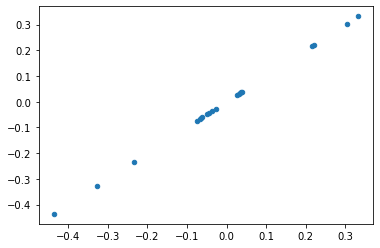

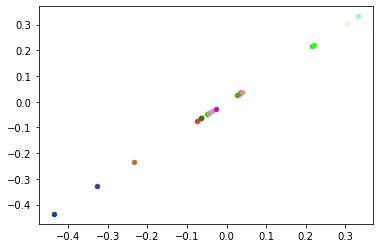

[{0: '#9AFFB2'}, {3: '#BC7620'}, {4: '#0CFD06'}, {5: '#2CDF00'}, {6: '#F9F2CF'}, {7: '#B59897'}, {8: '#3D4090'}, {9: '#CED965'}, {10: '#0F4295'}, {11: '#CB413E'}, {12: '#59A807'}, {13: '#DEDC74'}, {14: '#F88B86'}, {15: '#44F320'}, {16: '#D394E1'}, {17: '#C813BD'}, {18: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D'}]


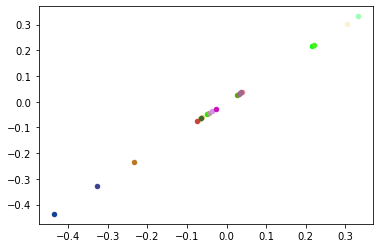

[{0: '#9AFFB2'}, {3: '#BC7620'}, {4: '#0CFD06'}, {5: '#2CDF00'}, {6: '#F9F2CF'}, {7: '#B59897'}, {8: '#3D4090'}, {9: '#CED965'}, {10: '#0F4295'}, {11: '#CB413E'}, {12: '#59A807'}, {13: '#DEDC74'}, {15: '#44F320'}, {16: '#D394E1'}, {17: '#C813BD'}, {18: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D'}]


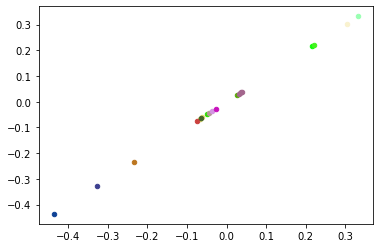

[{0: '#9AFFB2'}, {3: '#BC7620'}, {4: '#0CFD06'}, {5: '#2CDF00'}, {6: '#F9F2CF'}, {7: '#B59897'}, {8: '#3D4090'}, {10: '#0F4295'}, {11: '#CB413E'}, {12: '#59A807'}, {13: '#DEDC74'}, {15: '#44F320'}, {16: '#D394E1'}, {17: '#C813BD'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D'}, {18: '#44632A', 9: '#44632A'}]


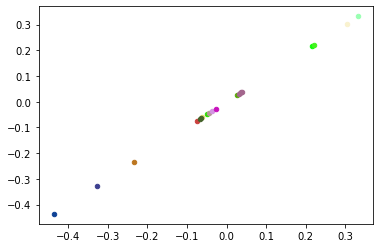

[{0: '#9AFFB2'}, {3: '#BC7620'}, {4: '#0CFD06'}, {5: '#2CDF00'}, {6: '#F9F2CF'}, {7: '#B59897'}, {8: '#3D4090'}, {10: '#0F4295'}, {11: '#CB413E'}, {13: '#DEDC74'}, {15: '#44F320'}, {16: '#D394E1'}, {17: '#C813BD'}, {18: '#44632A', 9: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}]


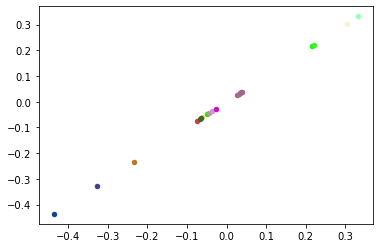

[{0: '#9AFFB2'}, {3: '#BC7620'}, {5: '#2CDF00'}, {6: '#F9F2CF'}, {7: '#B59897'}, {8: '#3D4090'}, {10: '#0F4295'}, {11: '#CB413E'}, {13: '#DEDC74'}, {16: '#D394E1'}, {17: '#C813BD'}, {18: '#44632A', 9: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}]


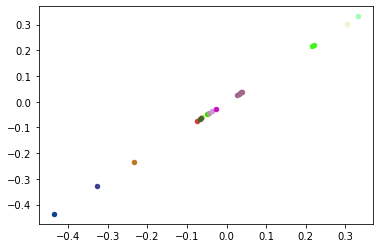

[{0: '#9AFFB2'}, {3: '#BC7620'}, {6: '#F9F2CF'}, {8: '#3D4090'}, {10: '#0F4295'}, {11: '#CB413E'}, {13: '#DEDC74'}, {16: '#D394E1'}, {17: '#C813BD'}, {18: '#44632A', 9: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {7: '#B59897', 5: '#B59897'}]


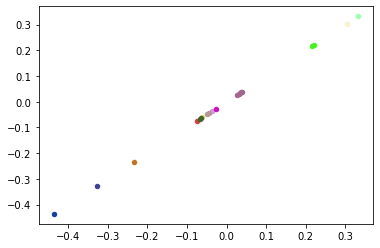

[{0: '#9AFFB2'}, {3: '#BC7620'}, {6: '#F9F2CF'}, {8: '#3D4090'}, {10: '#0F4295'}, {11: '#CB413E'}, {13: '#DEDC74'}, {17: '#C813BD'}, {18: '#44632A', 9: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {7: '#B59897', 5: '#B59897', 16: '#B59897'}]


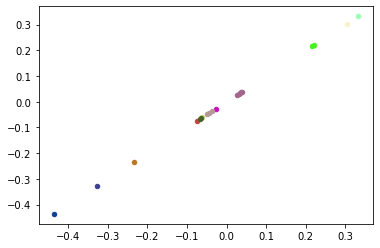

[{0: '#9AFFB2'}, {3: '#BC7620'}, {6: '#F9F2CF'}, {8: '#3D4090'}, {10: '#0F4295'}, {11: '#CB413E'}, {13: '#DEDC74'}, {18: '#44632A', 9: '#44632A'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {7: '#B59897', 5: '#B59897', 16: '#B59897', 17: '#B59897'}]


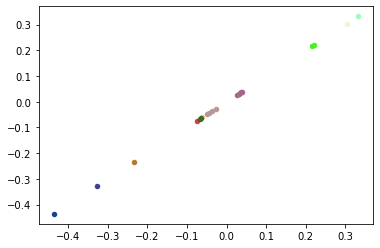

[{0: '#9AFFB2'}, {3: '#BC7620'}, {6: '#F9F2CF'}, {8: '#3D4090'}, {10: '#0F4295'}, {13: '#DEDC74'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {7: '#B59897', 5: '#B59897', 16: '#B59897', 17: '#B59897'}, {18: '#44632A', 9: '#44632A', 11: '#44632A'}]


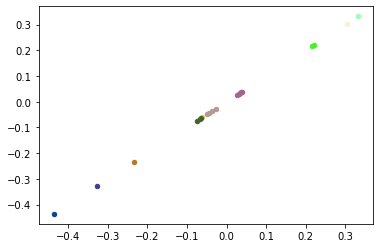

[{0: '#9AFFB2'}, {3: '#BC7620'}, {6: '#F9F2CF'}, {8: '#3D4090'}, {10: '#0F4295'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {7: '#B59897', 5: '#B59897', 16: '#B59897', 17: '#B59897'}, {18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A'}]


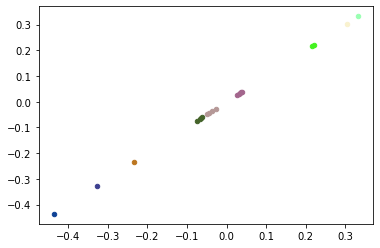

[{0: '#9AFFB2'}, {3: '#BC7620'}, {6: '#F9F2CF'}, {8: '#3D4090'}, {10: '#0F4295'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A', 7: '#44632A', 5: '#44632A', 16: '#44632A', 17: '#44632A'}]


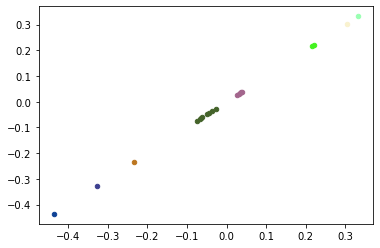

[{3: '#BC7620'}, {8: '#3D4090'}, {10: '#0F4295'}, {2: '#A3668D', 1: '#A3668D', 19: '#A3668D', 14: '#A3668D', 12: '#A3668D'}, {15: '#44F320', 4: '#44F320'}, {18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A', 7: '#44632A', 5: '#44632A', 16: '#44632A', 17: '#44632A'}, {6: '#F9F2CF', 0: '#F9F2CF'}]


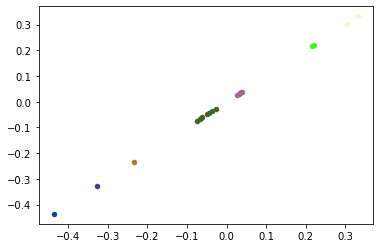

[{3: '#BC7620'}, {8: '#3D4090'}, {10: '#0F4295'}, {15: '#44F320', 4: '#44F320'}, {6: '#F9F2CF', 0: '#F9F2CF'}, {18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A', 7: '#44632A', 5: '#44632A', 16: '#44632A', 17: '#44632A', 2: '#44632A', 1: '#44632A', 19: '#44632A', 14: '#44632A', 12: '#44632A'}]


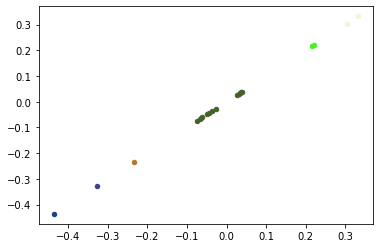

[{3: '#BC7620'}, {8: '#3D4090'}, {10: '#0F4295'}, {18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A', 7: '#44632A', 5: '#44632A', 16: '#44632A', 17: '#44632A', 2: '#44632A', 1: '#44632A', 19: '#44632A', 14: '#44632A', 12: '#44632A'}, {6: '#F9F2CF', 0: '#F9F2CF', 15: '#F9F2CF', 4: '#F9F2CF'}]


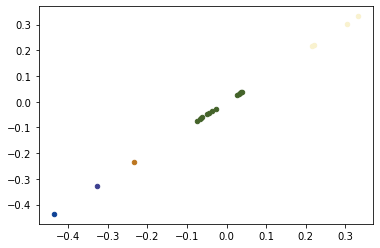

[{10: '#0F4295'}, {18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A', 7: '#44632A', 5: '#44632A', 16: '#44632A', 17: '#44632A', 2: '#44632A', 1: '#44632A', 19: '#44632A', 14: '#44632A', 12: '#44632A'}, {6: '#F9F2CF', 0: '#F9F2CF', 15: '#F9F2CF', 4: '#F9F2CF'}, {8: '#3D4090', 3: '#3D4090'}]


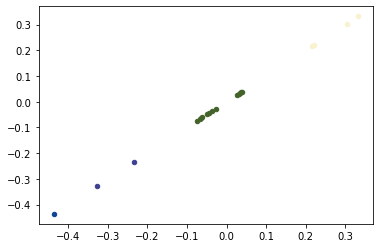

[{18: '#44632A', 9: '#44632A', 11: '#44632A', 13: '#44632A', 7: '#44632A', 5: '#44632A', 16: '#44632A', 17: '#44632A', 2: '#44632A', 1: '#44632A', 19: '#44632A', 14: '#44632A', 12: '#44632A'}, {6: '#F9F2CF', 0: '#F9F2CF', 15: '#F9F2CF', 4: '#F9F2CF'}, {8: '#3D4090', 3: '#3D4090', 10: '#3D4090'}]


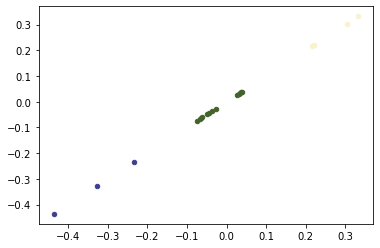

[{6: '#F9F2CF', 0: '#F9F2CF', 15: '#F9F2CF', 4: '#F9F2CF'}, {8: '#3D4090', 3: '#3D4090', 10: '#3D4090', 18: '#3D4090', 9: '#3D4090', 11: '#3D4090', 13: '#3D4090', 7: '#3D4090', 5: '#3D4090', 16: '#3D4090', 17: '#3D4090', 2: '#3D4090', 1: '#3D4090', 19: '#3D4090', 14: '#3D4090', 12: '#3D4090'}]


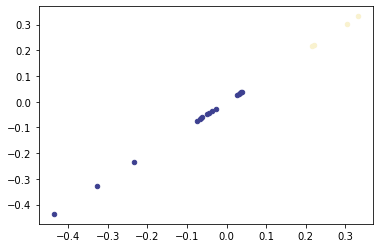

[{8: '#3D4090', 3: '#3D4090', 10: '#3D4090', 18: '#3D4090', 9: '#3D4090', 11: '#3D4090', 13: '#3D4090', 7: '#3D4090', 5: '#3D4090', 16: '#3D4090', 17: '#3D4090', 2: '#3D4090', 1: '#3D4090', 19: '#3D4090', 14: '#3D4090', 12: '#3D4090', 6: '#3D4090', 0: '#3D4090', 15: '#3D4090', 4: '#3D4090'}]


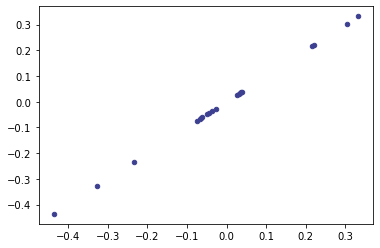

12.325376987457275


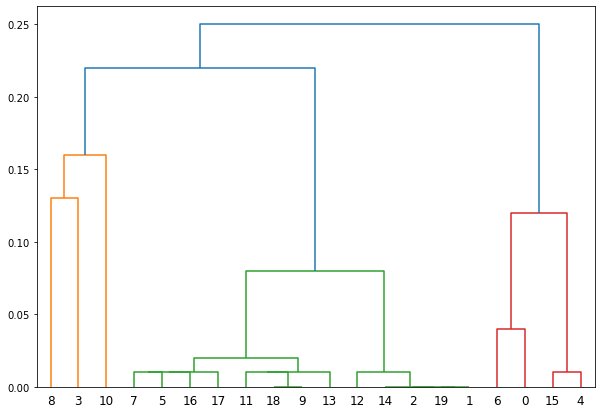

In [5]:



colors = {i :"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(df))}

dist = np.reshape(np.zeros((len(df),len(df))), (len(df),len(df)))
dist = pd.DataFrame(dist, columns=list(range(len(df))), index=list(range(len(df))))

intermediate_arrays = []
abc = []
added = []
done = {}
yes = 0
Z = []
length = len(df)

def euclidean(x, y, x1, y1):
    return np.round(np.sqrt((x - x1) ** 2 + (y - y1) ** 2), 2)


def create_distance_matrix():
    for index, x, y in df.itertuples():
        for index1, x1, y1 in df.itertuples():
            dist[index][index1] = euclidean(x,y,x1,y1)
            dist[index1][index] = dist[index][index1]


def update_distance_matrix():
    global length
    global Z
    global done
    x=1
    y=1
    no = 0
    key = 0
    small = max(dist.max())+1
    for i in dist.index:
        for j in dist.columns:
            if i != j:
                if dist[i][j] < small:
                    small = dist[i][j]
                    x = i
                    y = j
    
    #For The Dendrogram-----------------------------------------
    b = []
    if len(dist) != 2:
        for p in done.keys():
            if x in done[p] or y in done[p]:
                no = 1
                key = p
                b.append(p)

        if no:
            done[length] = []
            l = y if x in done[key] else x
            done[length].append(l)
            done[length].extend(done[key][:-1])
            count = done[key][-1]['count']+1
            
            temp = []
            a = 0
            #print(length)
            for p in done.keys():
                if l in done[p] and p != key and p != length:
                    done[length].extend(done[p][:-1])
                    count += done[p][-1].get('count')
                    temp.append(p)
                    a += 1
            count -= a
            done[length] = list(np.unique(done[length]))
            done[length].append({'count' : count})
            
            for i in b:
                if l in done[i] and i != key:
                    l = i
            Z.append([key, l, small, done[key][-1]['count']+1])
            
            
            del(done[key])
            for i in temp:
                del(done[i])
            length += 1
            
            #print(Z)
            #print(done)
        else:
            Z.append([x, y, small, 2])
            done[length] = []
            done[length].append(x)
            done[length].append(y)
            done[length].append({'count' : 2})
            length += 1
            #print(done)
    else:
        a = []
        value = 0
        for i in done.keys():
            value += done[i][-1]['count']
            a.append(i)
        if len(a) == 1:
            a.append(x if x not in done[length-1] else y)
        a.append(small)
        a.append(value)
        Z.append(a)
        #print(done)
    #-----------------------------------------------------
    return x, y


def clustering(x, y):
    tmp = x if x < y else y
    p = y if x < y else x
    
    temp = np.reshape(np.zeros((len(dist)-1,len(dist)-1)), (len(dist)-1,len(dist)-1))
    temp = pd.DataFrame(dist, columns=list(range(len(dist)-1)), index=list(range(len(dist)-1)))
    temp.columns = [l for l in dist.columns if l != p]
    temp.index = [l for l in dist.index if l != p]
    
    for i in temp.index:
        for j in temp.columns:
            if i == tmp:
                temp[i][j] = min(dist[x][j],dist[y][j])
                temp[j][i] = temp[i][j]
            elif i < tmp:
                temp[i][j] = dist[i][j]
                temp[j][i] = temp[i][j]
            else:
                if j == tmp:
                    temp[i][j] = min(dist[i][x],dist[i][y])
                    temp[j][i] = temp[i][j]
                else:
                    temp[i][j] = dist[i][j]
                    temp[j][i] = temp[i][j]
    return temp



def intersection(lst1, lst2):
    if len([value for value in lst1 if value in lst2]) > 0:
        return 1
    else:
        return 0


def update_clusters():
    global abc
    tempo = {}
    g = 0
    i = 0
    #print(abc)
    while(i < len(abc)):
        j = i+1
        while(j < len(abc)):
            if intersection(list(abc[i].keys()), list(abc[j].keys())):
                tempo = {**abc[i], **abc[j]}
                tempo = dict.fromkeys(tempo, colors[list(tempo.keys())[0]])
                abc.append(tempo)
                del abc[j]
                del abc[i]
                g=1
            j += 1
        if g:
            i = 0
            g = 0
        else:
            i += 1
            


def plot():
    plt.figure()
    for i in abc:
        for j in i.keys():
            plt.scatter(df['x'][j], df['y'][j], c=i[j], s=20)
    plt.show()


def compute_center(lst):
    sum = 0
    index = 0
    small = math.inf
    for i in lst:
        for j in lst:
            sum += euclidean(df['x'][i], df['y'][i], df['x'][j], df['y'][j])
        if sum < small:
            small = sum
            index = i
        sum = 0
    return index, small


def homogeneity():
    global abc
    homo = 0
    for i in range(len(abc)):
        index, small = compute_center(list(abc[i].keys()))
        for j in list(abc[i].keys()):
            homo += euclidean(df['x'][index], df['y'][index], df['x'][j], df['y'][j])
        homo /= len(abc[i].keys())
        #print("Homogeneity Of Cluster %d is %.2f"%(i,homo))
        homo = 0
    #return homo


def separation():
    global abc
    sum = 0
    N = 1
    p = 0
    
    
    for i in range(len(abc)):
        for j in range(len(abc)):
            if i != j:
                sum += len(list(abc[i].keys())) + len(list(abc[j].keys()))
    N = sum            
    for i in range(len(abc)):
        for j in range(len(abc)):
            if i != j:
                index1, small1 = compute_center(list(abc[i].keys()))
                index2, small2 = compute_center(list(abc[j].keys()))
                p = len(list(abc[i].keys())) * len(list(abc[j].keys())) * euclidean(df['x'][index1], df['y'][index1], df['x'][index2], df['y'][index2])
                #print("The Separation Between Cluster %d and %d is %.2f"%(i, j, p/N))
                p = 0
    #N = sum
    #return p/N


def ahc_single():
    global dist
    global intermediate_arrays
    global abc
    create_distance_matrix()
    round = 1
    plt.scatter(df['x'], df['y'], s=20)
    while len(dist) != 1:
        x, y = update_distance_matrix()
        temp = {}
        temp[x] = {colors[x if x < y else y]}
        temp[y] = {colors[x if x < y else y]}
        abc.append(temp)
        #print("Initial Clusters : ")
        #print(abc)
        if round == 1:
            for j in range(len(df)):
                b = {}
                for i in abc:
                    if j in list(i.keys()):
                        global yes
                        yes += 1
                if yes == 0:
                    b = (dict({j: colors[j]}))
                    abc.append(b)
                else:
                    yes = 0
        update_clusters()
        #print("Final Clusters : ")
        print(abc)
        if round == 1:
            print("Initial Points Are : ")
        plot()
        homogeneity()
        #print("Homogeneity Of Cluster is %.2f"%(homogeneity()))
        if round+1 != len(df):
            separation()
            #print("Separation Of Clusters is %.2f\n\n"%(separation()))
        
        dist = clustering(x, y)
        #print("Dist Mat : ")
        #print(dist)
        intermediate_arrays.append(dist)
        round += 1


if __name__ == "__main__":
    start = time.time()
    ahc_single()
    end = time.time()
    print(end-start)
    Z = np.asarray(Z)
    #print(Z)


    labelList = range(0, len(df))

    plt.figure(figsize=(10, 7))  
    dendrogram(Z,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
    plt.show()  

In [7]:
df1 = pd.read_csv("BR_mod.csv",names = ['x', 'y'])
df1 = df1.fillna(df1.mean())
df = df1.sample(n=20).reset_index(drop=True)
print(df)

    x   y
0   0  17
1   0  13
2   1  19
3   0  19
4   0  10
5   0  12
6   0  14
7   0   9
8   1  16
9   1  16
10  0   7
11  1  16
12  1  15
13  0   7
14  1   5
15  0   5
16  0  13
17  0  14
18  0   4
19  1  16
